In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [67]:
class SGD:
    def __init__(self, epochs, eta):
        self.epochs = epochs
        self.eta = eta
    
    def net_input(self, X):
        w_0 = self.weights[0]
        return np.dot(X, self.weights[1:]) + w_0
    
    def activation(self, n_input):
        return n_input
    
    def error(self, y, a_input):
        return y - a_input
    
    def update(self, xi, yi):
        n_input = self.net_input(xi)
        a_input = self.activation(n_input)
        e = self.error(yi, a_input)
        self.weights[0] = self.weights[0] + self.eta * e
        self.weights[1:] = self.weights[1:] + self.eta * e * xi
        cost = e ** 2 * 0.5
        return cost
        
    def update_batch(self, X, y):
        n_input = self.net_input(X)
        a_input = self.activation(n_input)
        e = self.error(y, a_input)
        self.weights[0] = self.weights[0] + self.eta * e.sum()
        self.weights[1:] = self.weights[1:] + self.eta * np.dot(e, X)
        cost = 0.5 * np.dot(e, e)
        return cost
    
    def init_weights(self, n):
        self.weights = np.random.normal(loc = 0.1, scale = 0.1, size = n + 1)
        self.weight_init = True
    
    def fit(self, X, y, mini_batch = False):
        self.init_weights(X.shape[1])
        assert(X.shape[1] + 1 == len(self.weights))
        costs = []
        if not mini_batch:
            for _ in range(self.epochs):
                cost = 0
                for item, label in zip(X, y):
                    e = self.update(item, label)
                    cost += e
                cost = cost / X.shape[1]
                costs.append(cost)
        else:
            for _ in range(self.epochs):
                batch_size = 10
                iters = X.shape[0] // batch_size + 1
                passes = 1
                cost = 0
                while passes <= iters:
                    low = (passes - 1) * batch_size
                    high = passes * batch_size
                    print "low is %s high is %s" %(low, high)
                    X_, y_ = X[low:high, :], y[low:high]
                    e = self.update_batch(X_, y_)
                    cost += e
                    passes += 1
                cost = cost / X.shape[1]
                costs.append(cost)
                
        return costs

In [68]:
iris = pd.read_csv("iris.data", names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "label"])
y = iris.iloc[0:100, 4].values
y = np.where(y == "Iris-setosa",-1, 1)
X = iris.iloc[0:100, [0,2]].values

In [69]:
sgd1 = SGD(20, 0.001)
costs1 = sgd.fit(X, y)
sgd2 = SGD(10, 0.001)
costs2 = sgd2.fit(X, y, True)

low is 0 high is 10
low is 10 high is 20
low is 20 high is 30
low is 30 high is 40
low is 40 high is 50
low is 50 high is 60
low is 60 high is 70
low is 70 high is 80
low is 80 high is 90
low is 90 high is 100
low is 100 high is 110
low is 0 high is 10
low is 10 high is 20
low is 20 high is 30
low is 30 high is 40
low is 40 high is 50
low is 50 high is 60
low is 60 high is 70
low is 70 high is 80
low is 80 high is 90
low is 90 high is 100
low is 100 high is 110
low is 0 high is 10
low is 10 high is 20
low is 20 high is 30
low is 30 high is 40
low is 40 high is 50
low is 50 high is 60
low is 60 high is 70
low is 70 high is 80
low is 80 high is 90
low is 90 high is 100
low is 100 high is 110
low is 0 high is 10
low is 10 high is 20
low is 20 high is 30
low is 30 high is 40
low is 40 high is 50
low is 50 high is 60
low is 60 high is 70
low is 70 high is 80
low is 80 high is 90
low is 90 high is 100
low is 100 high is 110
low is 0 high is 10
low is 10 high is 20
low is 20 high is 30
low is

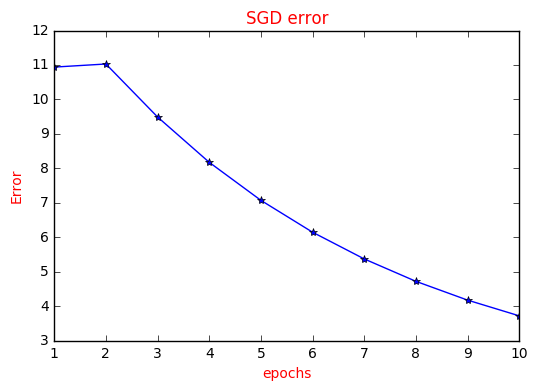

In [63]:
plt.plot(range(1, len(costs1) + 1), costs1, marker = "*")
plt.xlabel("epochs", color = "red")
plt.ylabel("Error", color = "red")
plt.title("SGD error", color = "red")
plt.show()

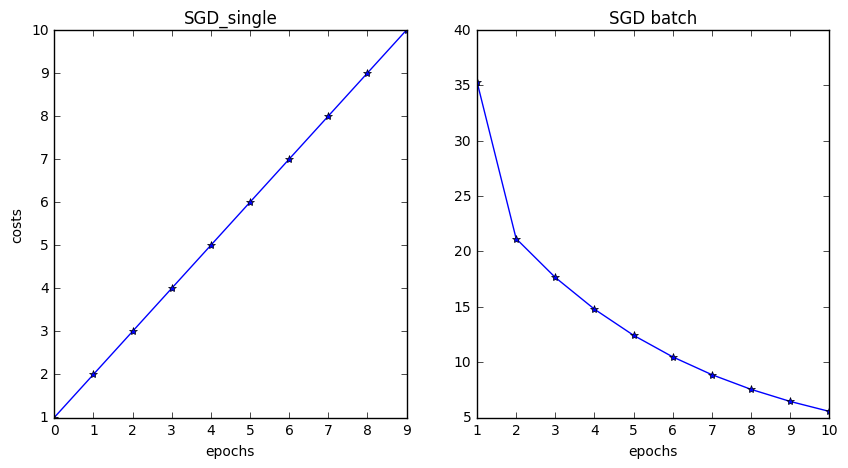

In [64]:
fig, axes = plt.subplots(nrows=1, ncols = 2, figsize = (10, 5))
axes[0].plot(range(1, len(costs1) + 1), marker = "*", color = "blue")
axes[0].set_xlabel("epochs")
axes[0].set_ylabel("costs")
axes[0].set_title("SGD_single")

axes[1].plot(range(1, len(costs2) + 1), costs2, marker = "*", color = "blue")
axes[1].set_xlabel("epochs")
axes[1].set_title("SGD batch")
